# Week 5 : Lecture A 
 ## Interaction: File I/O and Callbacks
 ##### CS1P - University of Glasgow - John H. Williamson - 2017/2018 -- Python 3.x

## External data
Programs that only dealt with values we **hard coded** into the code or which could only take text input from the user (like using `input()`) would be of very limited use. We might be able to print out tables of calculations, like old-school log tables

<img src="imgs/logtable.jpg">
*[Image credit: Mark Wilson via flickr.com CC-BY 2.0]*

But everything else requires contact with the outside world: fetching images from webservers, writing reports to databases, handling mouse click events, monitoring sensors. 

There are two very useful abstractions for talking to the outside world:

* **Files**, which provide a universal way to store and transfer information between programs.
* **Event-based programming** which transfers the flow of execution of a program to an external controlling "process".

# Files: Why?


###  To persist data
When you turn off a computer, the data in memory disappears. In the shorter term, when you exit a program, the information stored in memory by that program is freed by the operating system and is lost.

The way to store information so that it can be used again later (to make it **persistent**, i.e. not go away) is to write it into a file. The file can be read at any later date and used as needed.

### To interchange data
Files can be sent to other programs (e.g. you might write a program to produce and image, which you could load in a photo editor). Files can be uploaded to servers and downloaded from them. You can shared files on GitHub or Dropbox or via email.

They are the most basic way of getting data **between programs**. That we can break up our computer use into wholly separate programs whose interaction is only through files is a major acheivement of computer system design.

Operating systems also provide **file-like** services which allow programs to talk to each other as if they were writing to or reading from files. This is how Unix-style pipes (`ls | more`) and system files (`cat file > /dev/null`) work.

### To organise data
The **filesystem** of a computer is a very simple but very powerful and flexible way of organising information. By placing data into individual files, and then putting these into directories, we have a simple, universal way of organising data.

### When computations won't fit in memory
The computer I'm using has quite a lot of memory (16GB). But I often have to run computations that use need much more than this. A collection of images could easily be 100s of GB. If I want to, for example, crop all of them to remove the border, I can't possibly load them all into memory and crop them. The only way to do this sensibly is to keep data on disk in files, and process it a bit at a time.

### Why not files?
File access is slower than accessing data stored in memory (e.g. values in variables). Much, much, much slower. Sometimes a **million times slower** or more.

And, most importantly, files are not just big collections of variables you can read and write. Files provide a **stream** of data, essentially just a very long string, which you can only work with in order.  We (to some extent) only have **serial** access to files: we can read one thing after another, and that's it.

This means that converting from this string into values you can use requires work. Doing this well is a major aspect of computing; this is why we have databases and standardised file formats `(.jpg, .png, .doc, .wav, .zip)`. Each of these lays out information in a precise way so it can be used again later.

Converting variables into a form where they can be written into a file (or sent over a network) is called **serialization** and converting back to variables is called **deserialization**.

----

### Streams
The stream model of file I/O (I/O means **input-output** and file I/O just means reading and writing files) dates back to the days when computers used big tape reels for file storage. This is so long ago I've never seen a real working computer with actively used tape files [tapes are still used for long-term backups].
<img src="imgs/magtape.jpg" width="200px">
*[Photo credit: By MBlairMartin - Own work, CC BY-SA 4.0, https://commons.wikimedia.org/w/index.php?curid=50243911]*


### Using context managers
Files must be **opened** to read from them or write to them. Once a program is done with a file, it must be **closed**. This is so the operating system can keep track of which files are being used (e.g. to assist caching, or to prevent multiple processes writing to the same file at once).

Imagine **open**ing a bottle, pouring out a **stream** of water, then **closing** the lid back on. Forgetting to put the lid back on isn't immediately harmful, but you'd want to remember eventually or everything will evaporate!

<img src="imgs/bluebottel.jpg">
*[Image credit: By Taro Taylor - originally posted to Flickr as H20, CC BY 2.0, https://commons.wikimedia.org/w/index.php?curid=5768916]*

Luckily, Python makes it very easy to do this using a **context manager**. This uses the `with` syntax like this:

In [2]:
with open("sentences.txt") as f:
    print(f) # f will be open here
    print(f.readline()) # we can read from it

# it'll be closed here
print(f)

<_io.TextIOWrapper name='sentences.txt' mode='r' encoding='cp1252'>
The birch canoe slid on the smooth planks.

<_io.TextIOWrapper name='sentences.txt' mode='r' encoding='cp1252'>


In [3]:
# this will cause an IOError
print(f.readline())

ValueError: I/O operation on closed file.

Let's look at this in more detail:

* The `open()` call actually opens the file. 
* `as f` assigns the result of the `open` call to a new variable `f`. *Everything inside the `with` block has access to the file. After the `with` block, the file is automatically closed. 
* `readline()` reads one line of text from the file.
* `read()` will read the entire file in one go.

It is the same as doing this:

    f = open("sentences.txt")
    print(f)
    print(f.readline())
    f.close()
    
but it no matter what happens, it will always close the file correctly -- and the indentation will show you where the file is open.

This is an example of **resource management**. Files are limited resources. The `with` statement guarantees we will not leave resouces "hanging" and we can always see which part of the code can access the file (because it must be indented under the `with`). It **syntactically guarantees** that resources will be managed safely.

### <font color="green"> Always use `with` to read files. </font>

### Reading/writing
We're only going to consider reading and writing text files in order in CS1P. You'll see random access (skipping to different parts of files) and binary files in CS1PX.

As far as we're concerned, a file is a big long string, and we can read it starting from the start, or write to the end of it. But not both at the same time (this is possible, but we aren't going to look at it here).

To open a file so we can write to it, we use a second parameter to `open()`. This called the **mode** and it should be `"w"` to write to a file. By default it is `"r"` which means to read from a file.

**Note: opening a file for writing will overwrite the contents of that file!**

You can also **append** to an existing file by opening in mode `"a"` (append). This opens for writing, but *does not* overwrite the contents, and will start writing data at the end of the file.

`write()` writes data to a file. Succesive calls to `write()` will insert data at the end of a file.

In [4]:
# open in write mode, reseting the file
with open("write_out.txt", "w") as out_file:
    out_file.write("hello")
    out_file.write("from")

# now open in append mode and append another line
with open("write_out.txt", "a") as out_file:
    out_file.write("CS1P")

In [5]:
# now read the file back and print it out
with open("write_out.txt", "r") as out_file:
    print(out_file.read())

hellofromCS1P


### Newlines in writing

Note: unlike print, which automatically inserted a newline at the end of a print statement, we have to explicitly tell `write()` to write newline. If we don't do this, all of the output will appear as a single line!

Including the character sequence `\n` in a string will insert a newline. For example, this works if I print a string with \n inside it:

In [6]:
print("one\ntwo\nthree")

one
two
three


So to write a line of output to a file, you would use something like:

    f.write("some output here\n")
    f.write("this is the next line\n")
    
If you forget to put in the newline, you will end up with 

    some output herethis is the next line

### Iterating by lines
There is a nice **idiom** (idiom: a common pattern of speech or a common way of doing things) in Python to read a file line by line, because we very often want to work with text files in this form.  For example, we might have a list of movies from IMDB, one movie per line:

    ...
    Melody of Clock and Arrow (2006)		2006
    Melody of Cradle (2013)					2013
    Melody of Death (1922)					1922
    Melody of Fate (1911)					1911
    Melody of Funhouse (2013)				2013
    Melody of Life (2004) (V)				2004
    Melody of Love (1928)					1928
    Melody of My Heart (1936)				1936
    Melody of Noise (2016)					2016
    Melody of San Francisco (2009)			2009
    Melody of Subways (2012)				2012
    Melody of the Plains (1937)				1937
    Melody on Parade (1936)					1936
    ...


We can use a `for` loop, and use the file directly as the iterator:

In [7]:
with open("elements.txt") as f:
    for line in f:
        print("-->", line, end=' ')
        
print("End of file")

--> 1 H Hydrogen
 --> 2 He Helium
 --> 3 Li Lithium
 --> 4 Be Beryllium
 --> 5 B Boron
 --> 6 C Carbon
 --> 7 N Nitrogen
 --> 8 O Oxygen
 --> 9 F Fluorine
 --> 10 Ne Neon
 --> 11 Na Sodium
 --> 12 Mg Magnesium
 --> 13 Al Aluminum
 --> 14 Si Silicon
 --> 15 P Phosphorus
 --> 16 S Sulfur
 --> 17 Cl Chlorine
 --> 18 Ar Argon
 --> 19 K Potassium
 --> 20 Ca Calcium
 --> 21 Sc Scandium
 --> 22 Ti Titanium
 --> 23 V Vanadium
 --> 24 Cr Chromium
 --> 25 Mn Manganese
 --> 26 Fe Iron
 --> 27 Co Cobalt
 --> 28 Ni Nickel
 --> 29 Cu Copper
 --> 30 Zn Zinc
 --> 31 Ga Gallium
 --> 32 Ge Germanium
 --> 33 As Arsenic
 --> 34 Se Selenium
 --> 35 Br Bromine
 --> 36 Kr Krypton
 --> 37 Rb Rubidium
 --> 38 Sr Strontium
 --> 39 Y Yttrium
 --> 40 Zr Zirconium
 --> 41 Nb Niobium
 --> 42 Mo Molybdenum
 --> 43 Tc Technetium
 --> 44 Ru Ruthenium
 --> 45 Rh Rhodium
 --> 46 Pd Palladium
 --> 47 Ag Silver
 --> 48 Cd Cadmium
 --> 49 In Indium
 --> 50 Sn Tin
 --> 51 Sb Antimony
 --> 52 Te Tellurium
 --> 53 I Iodine
 -

This will return one line at a time until the end of the file.

### readlines and writelines
We can also read an entire file into a list of lines, using `readlines()`. This gives us a list of strings.

In [8]:
with open("elements.txt") as f:
    print(f.readlines())

['1 H Hydrogen\n', '2 He Helium\n', '3 Li Lithium\n', '4 Be Beryllium\n', '5 B Boron\n', '6 C Carbon\n', '7 N Nitrogen\n', '8 O Oxygen\n', '9 F Fluorine\n', '10 Ne Neon\n', '11 Na Sodium\n', '12 Mg Magnesium\n', '13 Al Aluminum\n', '14 Si Silicon\n', '15 P Phosphorus\n', '16 S Sulfur\n', '17 Cl Chlorine\n', '18 Ar Argon\n', '19 K Potassium\n', '20 Ca Calcium\n', '21 Sc Scandium\n', '22 Ti Titanium\n', '23 V Vanadium\n', '24 Cr Chromium\n', '25 Mn Manganese\n', '26 Fe Iron\n', '27 Co Cobalt\n', '28 Ni Nickel\n', '29 Cu Copper\n', '30 Zn Zinc\n', '31 Ga Gallium\n', '32 Ge Germanium\n', '33 As Arsenic\n', '34 Se Selenium\n', '35 Br Bromine\n', '36 Kr Krypton\n', '37 Rb Rubidium\n', '38 Sr Strontium\n', '39 Y Yttrium\n', '40 Zr Zirconium\n', '41 Nb Niobium\n', '42 Mo Molybdenum\n', '43 Tc Technetium\n', '44 Ru Ruthenium\n', '45 Rh Rhodium\n', '46 Pd Palladium\n', '47 Ag Silver\n', '48 Cd Cadmium\n', '49 In Indium\n', '50 Sn Tin\n', '51 Sb Antimony\n', '52 Te Tellurium\n', '53 I Iodine\n', 

`readlines()` is exactly the same as iterating through the lines of the file and storing them in a list as we go.

To do the opposite, we can write out a list of strings to a file, one line per liste element, using `writelines()`

In [9]:
with open("line_test.txt", "w") as f:
    f.writelines(["one", "two", "three"])

## One line at a time
We can also read one line at a time, using `readline()`. Instead of `for`, we can use `while`, but it is more awkward. However, if we need to conditionally read lines (unusual but possible) this is a more flexible way of reading in data.

In [10]:
with open("sentences.txt") as f:
    line = f.readline()
    while len(line)>0:
        #print(line, end=' ')
        line = f.readline()
    #print(line, end=' ')

The birch canoe slid on the smooth planks.
 Glue the sheet to the dark blue background.
 It's easy to tell the depth of a well.
 These days a chicken leg is a rare dish.
 Rice is often served in round bowls.
 The juice of lemons makes fine punch.
 The box was thrown beside the parked truck.
 The hogs were fed chopped corn and garbage.
 Four hours of steady work faced us.
 Large size in stockings is hard to sell.
 The boy was there when the sun rose.
 A rod is used to catch pink salmon.
 The source of the huge river is the clear spring.
 Kick the ball straight and follow through.
 Help the woman get back to her feet.
 A pot of tea helps to pass the evening.
 Smoky fires lack flame and heat.
 The soft cushion broke the man's fall.
 The salt breeze came across from the sea.
 The girl at the booth sold fifty bonds.
 The small pup gnawed a hole in the sock.
 The fish twisted and turned on the bent hook.
 Press the pants and sew a button on the vest.
 The swan dive was far short of perfect.


----
### Stripping

One annoying thing that happens when reading in text from files is extraneous **whitespace**. For example, reading a line includes the **newline** at the end. If you have a file `chocolate_products.txt` which contains lines like:

    dark chocolate
    milk chocolate
    white chocolate
    cocoa 
    cocoa butter

you might try and iterate over each line and see if any line matches `cocoa`

In [11]:
# won't work
with open("chocolate_products.txt") as choc_file:
    for line in choc_file:
        print(line)
        if line=="cocoa":
            # why isn't this ever called?!
            print("    ***Found cocoa***")

dark chocolate

milk chocolate

white chocolate

cocoa 

cocoa butter

hot chocolate

cooking chocolate



This is because there is a **newline character** at the end of the line. There must be one, in fact, because otherwise it wouldn't be a separate line at all!

We can see it easily if we print out the character code for the whole line:

In [2]:
# notice the 10 on the end of each line? That's the newline
# 32 is space
with open("chocolate_products.txt") as choc_file:
    for line in choc_file:
        for char in line:
            print("%02X" % ord(char), end=' ')
        print()

64 61 72 6B 20 63 68 6F 63 6F 6C 61 74 65 0A 
6D 69 6C 6B 20 63 68 6F 63 6F 6C 61 74 65 0A 
77 68 69 74 65 20 63 68 6F 63 6F 6C 61 74 65 0A 
63 6F 63 6F 61 20 0A 
63 6F 63 6F 61 20 62 75 74 74 65 72 0A 
68 6F 74 20 63 68 6F 63 6F 6C 61 74 65 0A 
63 6F 6F 6B 69 6E 67 20 63 68 6F 63 6F 6C 61 74 65 0A 


Notice all the `0A` at the end of each line? Those are character 10 (0x0A in hex), the newline character.

We can strip off all whitespace from the end of a string using `strip()`. This just trims off all space characters (space, newline, tabs). If we want to trim whitespace from the start, use `rstrip()` (right-strip).

In [13]:
# will work
with open("chocolate_products.txt") as choc_file:
    for line in choc_file:
        print(line.strip())
        if line.strip()=="cocoa":
            # this works now
            print("    ***Found cocoa!***")

dark chocolate
milk chocolate
white chocolate
cocoa
    ***Found cocoa!***
cocoa butter
hot chocolate
cooking chocolate


## Finding patterns
We can, for example, find every line that contains a string and write it to another file:

In [14]:
# note that we nest the two with statements.
# the order isn't important here, because we never do anything to the files until
# both files are open
pattern = "saw"
with open("matched.txt", "w") as out_file:
    with open("sentences.txt") as in_file:
        for line in in_file:
            # check if we match the pattern
            if pattern in line:
                out_file.write(line)

# find out what we wrote to the matched.txt file
with open("matched.txt") as in_file:
    print(in_file.read())

A saw is a tool used for making boards.
They took the axe and the saw to the forest.
The pup jerked the leash as he saw a feline shape.
She saw a cat in the neighbor's house.



### File-like types

Because of Python's **duck typing** model, things that behave like files but aren't really files can use exactly the same code. For example, we can open a connection to a web page, and read the data there as if it were an ordinary file:

In [25]:
# if you actually need to connect to a webpage
# don't use urllib -- use the requests package instead!
import urllib.request, urllib.parse, urllib.error

# connect to wikipedia
http = urllib.request.urlopen("http://en.wikipedia.org/wiki/Python_(programming_language)")

# read 5 lines of text, using the file-like interface

print(http.readlines()[:5])

[b'<!DOCTYPE html>\n', b'<html class="client-nojs" lang="en" dir="ltr">\n', b'<head>\n', b'<meta charset="UTF-8"/>\n', b'<title>Python (programming language) - Wikipedia</title>\n']


## Pickling
<img src="imgs/pickle.jpg">
*[Image credit: Robert Judge CC-BY-2.0]*

**Serialization** is the conversion of a value in memory into a format that can be written *serially* (e.g. one character at a time). Serialization transforms values in memory into strings, from which the original values can be precisely reconstructed. This can be used to persist values to disk -- *to store variables in a file so they can be used later.*

Python calls serialization **pickling** because it "preserves" the values for later use.

Pickling is a built-in bit of functionality, and can store most values directly to a file. Lists, tuples, dictionaries, etc. can be pickled, so (almost) any collection of data can be stored using pickle.

* `pickle.dump(value, file)` writes `value` to a `file`
* `pickle.load(file)` returns the value unpickled from that file.


In [3]:
import pickle # must import it
my_list = ["two", "hundred", "florins", ["or", "more"], 200, 50.9]

# must open for writing
with open("pickle_demo.pkl", "wb") as out_f:  
    # dump means "save this object"
    pickle.dump(my_list,out_f)

In [4]:
with open("pickle_demo.pkl", "rb") as in_f:      
    my_new_list = pickle.load(in_f)
    
print(my_new_list)

['two', 'hundred', 'florins', ['or', 'more'], 200, 50.9]


# Event-based programming
Most programs you have written so far have had the **program** in control of the flow of execution. You start the program, it does some operations, and maybe writes some file out or plots a graph. But most real-world software doesn't work like this. 

Small components of software might have this program-controlled flow of execution, but larger components need to **react to the external world**. This is particularly relevant when developing **user interfaces** or when dealing with **networked systems**. Event based programming means writing code that reacts to the environment. 

For example, programs might need to react to:

* UI controls -- e.g. an onscreen button being pressed
<img src="imgs/radio_button.png" width="100px">

* Actions in a game -- e.g. colliding with a bullet.
<img src="imgs/shmup.png">
*[Image credit: Surt via opengameart.org CC-BY-SA 3.0]*


* external sensors  -- e.g. an oil pressure sensor in a drilling rig.
<img src="imgs/sensor.jpg">
*[Image credit: Public domain]*
* network events -- e.g. a new packet of an image being downloaded.
<img src="imgs/nmap.png">
*[Image credit: Public domain]*
----

How do we write code that can **react** to the outside world, rather than dictating what happens in advance?

### Event loop
All software has to run through a sequence of pre-determined steps. That is all a compute can do. How then, can it react dynamically to the environment?

The most common solution, widely used in user interfaces and games, is an **event loop**. An event loop is just a loop that sits around waiting for **events** to happen, then calls the relevant code. For example, to handle a keypress, or to redraw the image shown on the screen. The event loop **polls** or checks for something interesting happening, and when it detects something new -- an **event** -- it hands control to a function to deal with the event.

[There is an alternative -- **interrupts** -- which requires *hardware support*, and is used for things like transferring data to the audio device on your computer]


    # an event loop usually runs forever 
    while True:
        keys = check_keyboard()
        if keys:
            handle_key_events(keys)
            
        # wait for a while, doing nothing
        time.sleep(0.05)
        
        # redraw the screen
        redraw_screen()
    
Unless you are writing a game engine or a custom user interface, you don't have direct access to the event loop. It runs somewhere in the background and **calls your code when it needs something**.

### Inversion of control
This pattern of programming is called **inversion of control** because it hands the control of the program over to a generic, usually simple program (like the **event loop**), which in turn delegates specific tasks to custom code. The generic program has to be passed the functions to execute the delegated tasks.

It is a very flexible pattern, and one which is vital in coding tasks like writing games.

### Callbacks
To respond to events, you register a **callback** with the event loop. A **callback** is just a function which is called from some other code: *don't call us, we'll call you.*

"Registering" a callback just means passing the function to the code. This *defers* the execution of the callback until an event happens.

<img src="imgs/event_loop.merm.png" width="1000px">

### First-class functions
As we have seen, in  Python, functions are *first-class values*. This means you can pass a function to another function as a parameter, put it into a variable and do anything you would to any other type, like an integer or a string.

We can simply pass a function to another piece of code, where it can be stored (e.g. in a variable or a list) until the corresponding event occurs. Then the stored function can be called.


In [31]:
def hammertime():
    print("Yo! It's hammertime")

# NOTE: no () here. We're using the function as a variable
# NOT calling it. If we used the brackets, we'd get the return value
# of the function!
a = hammertime    

# call a
a()

Yo! It's hammertime


In [32]:
# we can pass functions as parameters
def do_a_thing(fn):
    print("I was told to say:")
    fn()
    print("And I did.")
    
# again, note the absence of brackets after hammertime
do_a_thing(hammertime)

I was told to say:
Yo! It's hammertime
And I did.


This means a callback can be registered just by passing it as a parameter. We can attach a simple callback to a button.

In [8]:
# import some simple widgets
import ipywidgets as widgets
from IPython.display import display

# note that we need to have the parameter s
# here, because the button will callback with one parameter
def hammertime(s):
    print("Yo! It's Hammertime")    

# make a button, with some text on it
button = widgets.Button(description='Hit me!')

# tell the button what to do when I click it
# i.e. register a callback
button.on_click(hammertime)
display(button)

Yo! It's Hammertime
Yo! It's Hammertime
Yo! It's Hammertime


### Parameterised callbacks
We can use the **same** callback function to respond to many events, if we have a parameter telling us where the event originated from. For example, each callback for a button on an interface might trigger a similar action, but print a different message or play a different sound.

For this reason, it is common for the event loop to pass some details of the event to the callback. This usually includes the source of the event that triggered the callback.

We need to know the convention (the API) that the event loop is using to be able to write the right kind of callbacks.

In [1]:
# drum machine
import sounddevice
import scipy.io.wavfile
sounddevice.default.latency = ('low', 'low')

def load_sound(sound):
    sr, data = scipy.io.wavfile.read("samples/%s.wav" % sound)
    return data

def play_sound(button):
    sounddevice.play(button.sound)

button_a = widgets.Button(description = 'Kick')
button_b = widgets.Button(description = 'Hat')
button_c = widgets.Button(description = 'Clap')
button_d = widgets.Button(description = 'Hat')

button_a.sound = load_sound("bassdrum")
button_b.sound = load_sound("hat")
button_c.sound = load_sound("clap")
button_d.sound = load_sound("hat")

# note -- all the same callback function
button_a.on_click(play_sound)
button_b.on_click(play_sound)
button_c.on_click(play_sound)
button_d.on_click(play_sound)
# display all four buttons
display(widgets.HBox((button_a, button_b, button_c, button_d)))

NameError: name 'widgets' is not defined

<IPython.core.display.Javascript object>


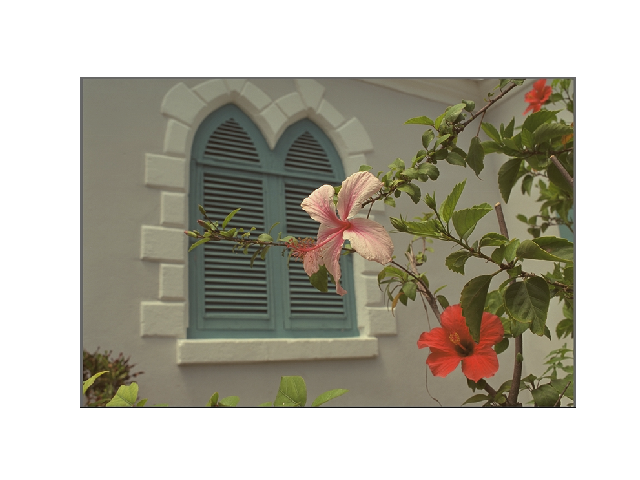

In [12]:
## Read an image
## (don't worry about this stuff -- just assume it loads an image and shows it)
import skimage.io
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
img = skimage.io.imread("imgs/kodim07.png")/255.0
plt.figure()
plt.axis("off")
plt.imshow(img)    

# this is the callback
def slider_callback(x):
    # the only important thing here is that x is the value we got 
    plt.gcf().clf()
    plt.axis("off")
    # change contrast according to x
    plt.imshow(np.clip((img-0.5)*x/25.0+0.5,0,1))    
    plt.gcf().canvas.draw()

In [13]:
slider = widgets.IntSlider(min=0, max=50, step=1, value=25)
display(widgets.interact(slider_callback, x=slider))

<function __main__.slider_callback>

## Callback conclusion
The key thing is that in event-based programming *we* don't call the functions to do things; we *pass* the functions to some event handling code and say "call this function when this action happens". 

The code is broken up into **event handlers** which are triggered on certain occasions. This is very flexible way of making code respond to the world.

### Context for callbacks
Callbacks are functions that your code doesn't call. So the arguments that get passed to them are not things that you can control. And access to the rest of the local state of the program isn't available to the callback when it runs.

This means that callbacks can do one of a few things to affect the world:

* access **global** variables and modify them, or call global functions etc. This works in simple cases, but there are many dangers with this approach.
* modify arguments that were passed (e.g. append a value to a list that was passed in by the caller)
* return values to the caller, e.g. telling the caller to stop calling the callback, or that an event has been handled.

The best approach depends on the definition of the caller; what it provides as parameters and what it accepts as return values.


# Finally
Please send your feedback via YACRS.

## Syntax review

In [ ]:
f = open("file.txt") # opens a file for reading
f = open("file.txt", "r") # opens a file we can read (same as above)
f = open("file.txt", "w") # opens a file we can write to
f = open("file.txt", "a") # opens a file we can write to, keeping what was there before

close(f) # closes a file

# Instead of manually cleaning up resources like closing a file you can use a with statement
with open("myfile.txt") as f:
    for line in f:
        print(line)
# file is now closed at this point

"string  ".strip() # strip removes trailing whitespace

pickle.dump(val, f) # writes value to a stream f in pickle format
pickle.load(f) # load a value from the stream f

## Week Review
* Files are an essential interchange and persistence mechanism.
* Files are read and written via streams.
* Streams must be opened before use and closed afterwards.
* Context managers (`with`) make this easy.
* The use of a file (read,write,append) is called the **mode** and must be specified on opening.
* Files are read from the start from the end, and writing to a file writes to the end.
* Text files are often read and written a line at a time.
* We can directly iterate over a stream with `for` to get lines of input.
* We can write to files with `write` but must be explicit about newlines
* `\n` in a string represents a newline character.
* When reading, we need to strip off newlines (and all trailing whitespace) using `strip()`
* We can use file-like operations on lots of data sources, for example network sockets.
* Pickling lets us serialize variables in memory to files and restore the files later.
* Event-based programming has code that responds to external events.
* This is an inversion of control -- the flow of control passes from your code to some external handler.
* Callbacks are just functions that are passed to some "handler" or event loop, and will be "called back" when some event happens.
* Callbacks are often passed an argument representing the source of an event.